# WeatherPy

Three trends observed in this data analysis:
1.A city's max temperature has a strong relation with its latitude, the closer to the equator, the higher max temperature the city has
2.A city's humidity,cloudiness and wind speed has weak relation with its latitude. 
3.Compared to cities further from equator,cities close to equator has high temperature, high humidity and vary little in windspeed.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime


# Import API key
from config import key_dict
weather_api_key=key_dict["OpenWeatherMap"]
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name 
 # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [4]:
# set up dataframe to store data
WeatherPy_df =pd.DataFrame(columns = ["City","Lat","Lng","Max Temp",
                                      "Humidity","Cloudiness", 
                                     "Wind Speed","Country","Date"])

# Perform API calls and send retrieved data to the WeatherPy data frame
base_url = "https://api.openweathermap.org/data/2.5/weather?"
print("Beginning Data Retrieval")
print("-------------------------")
count=1
set=1
index=0
import time
t0 =time.time()
for city in cities:
    query_url=base_url+"appid="+weather_api_key+"&q="+city+"&units=imperial"
    data=requests.get(query_url).json()
    try:
        print(f'Processing Record {count} of Set {set} | {data["name"]}')
        WeatherPy_df.loc[index, "City"]=data["name"]
        WeatherPy_df.loc[index, "Lat"]=data["coord"]["lat"]
        WeatherPy_df.loc[index, "Lng"]=data["coord"]["lon"]
        WeatherPy_df.loc[index, "Max Temp"]=data["main"]["temp_max"]
        WeatherPy_df.loc[index, "Humidity"]=data["main"]["humidity"]
        WeatherPy_df.loc[index, "Cloudiness"]=data["clouds"]["all"]
        WeatherPy_df.loc[index, "Wind Speed"]=data["wind"]["speed"]
        WeatherPy_df.loc[index, "Country"]=data["sys"]["country"]
        WeatherPy_df.loc[index, "Date"]=data["dt"]
        index=index+1
        count=count+1
    except:
        print("City not found. Skipping...")
    #count=count+1
    if count==51:
        count=1
        set=set+1
        t1=time.time()
        time.sleep(60-(t1-t0))
        t0=time.time()
        

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | Hanstholm
Processing Record 2 of Set 1 | Bambous Virieux
Processing Record 3 of Set 1 | Nueva Guinea
Processing Record 4 of Set 1 | Boa Vista
Processing Record 5 of Set 1 | Virginia Beach
Processing Record 6 of Set 1 | Busselton
Processing Record 7 of Set 1 | Saskylakh
Processing Record 8 of Set 1 | Mukhen
Processing Record 9 of Set 1 | Ushuaia
Processing Record 10 of Set 1 | Meulaboh
Processing Record 11 of Set 1 | Morondava
Processing Record 12 of Set 1 | Hasaki
Processing Record 13 of Set 1 | Dale
Processing Record 14 of Set 1 | Ribeira Grande
Processing Record 15 of Set 1 | Ol'ga
Processing Record 16 of Set 1 | Merauke
Processing Record 17 of Set 1 | Bluff
Processing Record 18 of Set 1 | Vaini
Processing Record 19 of Set 1 | Port Augusta
Processing Record 20 of Set 1 | Mataura
Processing Record 21 of Set 1 | Luba
Processing Record 22 of Set 1 | Kapaa
Processing Record 23 of Set 1 | Arraial do Cabo
Pro

Processing Record 34 of Set 4 | Ginda
Processing Record 35 of Set 4 | Madang
Processing Record 36 of Set 4 | Fortuna
Processing Record 37 of Set 4 | Grand Gaube
Processing Record 38 of Set 4 | Roald
Processing Record 39 of Set 4 | Mossamedes
Processing Record 40 of Set 4 | Isangel
Processing Record 41 of Set 4 | Lebyazh'ye
Processing Record 42 of Set 4 | Olafsvik
Processing Record 43 of Set 4 | Ajdabiya
Processing Record 44 of Set 4 | Kahului
Processing Record 45 of Set 4 | Verāval
Processing Record 46 of Set 4 | Velasco Ibarra
Processing Record 47 of Set 4 | Mafinga
Processing Record 48 of Set 4 | Provideniya
Processing Record 49 of Set 4 | Saint Paul Harbor
City not found. Skipping...
Processing Record 50 of Set 4 | Jackson
Processing Record 1 of Set 5 | Kaitangata
Processing Record 2 of Set 5 | Harper
City not found. Skipping...
Processing Record 3 of Set 5 | Puerto Madero
Processing Record 4 of Set 5 | Buala
Processing Record 5 of Set 5 | Morón
Processing Record 6 of Set 5 | Muscle

Processing Record 20 of Set 8 | Sinnamary
Processing Record 21 of Set 8 | Tsimmerbude
Processing Record 22 of Set 8 | The Valley
City not found. Skipping...
Processing Record 23 of Set 8 | Meadow Lake
Processing Record 24 of Set 8 | Ilebo
Processing Record 25 of Set 8 | Lebu
Processing Record 26 of Set 8 | Leningradskiy
City not found. Skipping...
Processing Record 27 of Set 8 | Mogadishu
Processing Record 28 of Set 8 | Leh
Processing Record 29 of Set 8 | Derzhavīnsk
Processing Record 30 of Set 8 | Lagoa
Processing Record 31 of Set 8 | Vredendal
Processing Record 32 of Set 8 | Megion
Processing Record 33 of Set 8 | Kendari
City not found. Skipping...
City not found. Skipping...
Processing Record 34 of Set 8 | Ambilobe
City not found. Skipping...
Processing Record 35 of Set 8 | Turukhansk
Processing Record 36 of Set 8 | Buri
Processing Record 37 of Set 8 | Egvekinot
Processing Record 38 of Set 8 | Dehui
City not found. Skipping...
Processing Record 39 of Set 8 | San Policarpo
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
WeatherPy_df.Lat.describe()
WeatherPy_df.to_csv("output_data/cities.csv",encoding='utf-8', index=False)
print(len(WeatherPy_df))
WeatherPy_df.head()


549


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hanstholm,57.1167,8.6167,36,3,0,8.21,DK,1615934081
1,Bambous Virieux,-20.3428,57.7575,78.8,78,75,8.05,MU,1615934082
2,Nueva Guinea,11.6876,-84.4562,78.28,65,84,9.75,NI,1615934082
3,Boa Vista,2.8197,-60.6733,82.4,69,40,9.22,BR,1615934244
4,Virginia Beach,36.8529,-75.978,46.4,87,90,8.05,US,1615934281


In [65]:
WeatherPy_float_df=WeatherPy_df[["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]].astype(float)
WeatherPy_float_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,5.490000e+02
mean,18.777399,15.458844,54.319381,72.677596,55.045537,7.944572,1.615935e+09
std,33.400822,91.651587,27.276662,20.108825,37.912593,5.643471,3.048758e+02
min,-54.800000,-179.166700,-43.400000,3.000000,0.000000,0.600000,1.615934e+09
25%,-8.836800,-65.102300,36.370000,65.000000,20.000000,3.740000,1.615934e+09
50%,22.433300,19.934800,62.600000,78.000000,68.000000,6.710000,1.615935e+09
75%,46.844000,95.322200,77.000000,88.000000,90.000000,10.740000,1.615935e+09
max,78.218600,178.416700,95.000000,100.000000,100.000000,32.820000,1.615935e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [66]:
print(WeatherPy_df["Humidity"].max())
humidity_outliers=WeatherPy_df.loc[WeatherPy_df["Humidity"]>100]
humidity_outliers

100


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
#  Get the indices of cities that have humidity over 100%.
humidity_outliers.index

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=WeatherPy_df.drop(index=humidity_outliers.index,inplace=False)
print(len(clean_city_data))
clean_city_data.head()


549


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hanstholm,57.1167,8.6167,36,3,0,8.21,DK,1615934081
1,Bambous Virieux,-20.3428,57.7575,78.8,78,75,8.05,MU,1615934082
2,Nueva Guinea,11.6876,-84.4562,78.28,65,84,9.75,NI,1615934082
3,Boa Vista,2.8197,-60.6733,82.4,69,40,9.22,BR,1615934244
4,Virginia Beach,36.8529,-75.978,46.4,87,90,8.05,US,1615934281


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

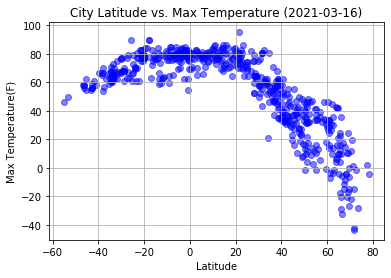

In [24]:
#plt.figure(figsize=(10,6))
# sns.set()
x_values=WeatherPy_df["Lat"]
y_values=WeatherPy_df["Max Temp"]
plt.scatter(x_values,y_values,color="blue",alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title(f'City Latitude vs. Max Temperature ({datetime.now().date()})')
plt.grid()
plt.savefig("output_data/fig1.png")
plt.show()

With the scatter plot above, we try to figure out if there is any relationship between City Latitude and its Max Temperature. We can tell from the scatter plot that cities closer to equator has higher max temperature while cities further from equator has lower max temperature.But north hemisphere has more variance in max temperature changes and the reason could be it is mostly ocean in the south hemisphere and the temperature does not vary that much as north hemisphere.  

## Latitude vs. Humidity Plot

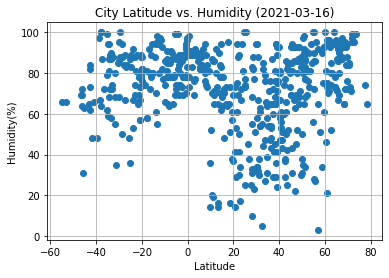

In [25]:
x_values=WeatherPy_df["Lat"]
y_values=WeatherPy_df["Humidity"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f'City Latitude vs. Humidity ({datetime.now().date()})')
plt.grid()
plt.savefig("output_data/fig2.png")
plt.show()

With the scatter plot above, we try to figure out if there is any relationship between City Latitude and its Humidity. We can tell from the scatter plot that most cities between latitude(-20,20) has high humidity between 60% to 100% while humidity for cities further from equator vary a lot between 20% to 100%.Like the variance in temperature, north hemisphere has more variance in humidity too and the reason could be landscapes in north hemisphere plays an important role in shaping very different climate for cities even at the same latitude.

## Latitude vs. Cloudiness Plot

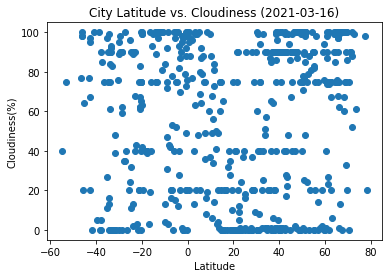

In [26]:
x_values=WeatherPy_df["Lat"]
y_values=WeatherPy_df["Cloudiness"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f'City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.savefig("output_data/fig3.png")
plt.show()

With the scatter plot above, we try to figure out if there is any relationship between City Latitude and its Cloudiness. We can tell from the scatter plot that humidity varies a lot from o % to 100% for all the cities from all the latitudes. Cloudiness does seem to change with the variance of latitudes. 

## Latitude vs. Wind Speed Plot

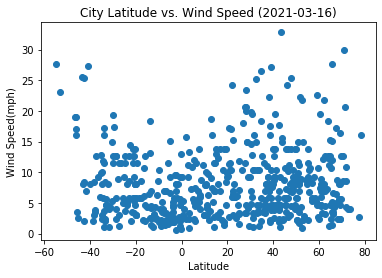

In [27]:
x_values=WeatherPy_df["Lat"]
y_values=WeatherPy_df["Wind Speed"]
plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f'City Latitude vs. Wind Speed ({datetime.now().date()})')
plt.savefig("output_data/fig4.png")
plt.show()

With the scatter plot above, we try to figure out if there is any relationship between City Latitude and its Windspeed. We can tell from the scatter plot that windspeed for most cities closer to equator are low between 0 to 15mph and there is not much variance between cities. While windspeed varies for cities with higher latitude form both north hemisphere and south hemisphere even though the majority of cities has wind speed 0-15 mph. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [30]:
Northern_df=WeatherPy_df.loc[WeatherPy_df["Lat"]>=0]
Southern_df=WeatherPy_df.loc[WeatherPy_df["Lat"]<0]

The r_value is: -0.88


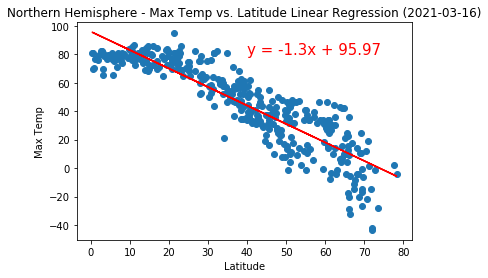

In [37]:
x_values=Northern_df["Lat"].astype(float)
y_values=Northern_df["Max Temp"].astype(float)
r_value=st.pearsonr(x_values,y_values)[0]
print("The r_value is: "+str(round(r_value,2)))
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression ({datetime.now().date()})')
plt.savefig("output_data/fig5.png")
plt.show()



With the linear regression above, we try to model the relationship between City Latitude from northeren hemisphere and its Max Temperature. We can tell from the figure that the data points are close to the regression line, therefore there is strong relation between City Latitude from northeren hemisphere and its Max Temperature.The higher the latitude is, the lower the max temperature is.  

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r_value is: 0.64


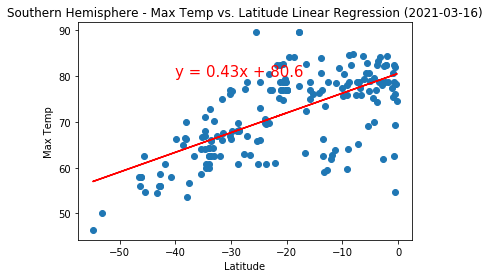

In [50]:
x_values=Southern_df["Lat"].astype(float)
y_values=Southern_df["Max Temp"].astype(float)
r_value=st.pearsonr(x_values,y_values)[0]
print("The r_value is: "+str(round(r_value,2)))
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude Linear Regression ({datetime.now().date()})')
plt.savefig("output_data/fig6.png")
plt.show()

With the linear regression above, we try to model the relationship between City Latitude from southern hemisphere and its Max Temperature. We can tell from the r-value and the figure that there is moderate high relation between City Latitude from southern hemisphere and its Max Temperature.The lower the latitude is, the higher the max temperature is.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r_value is 0.18


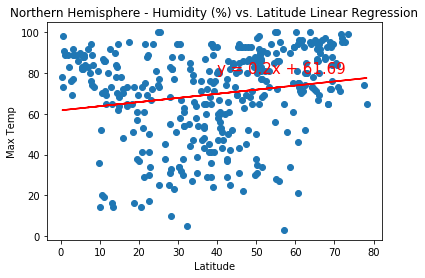

In [42]:
x_values=Northern_df["Lat"].astype(float)
y_values=Northern_df["Humidity"].astype(float)
r_value=st.pearsonr(x_values,y_values)[0]
print("The r_value is "+str(round(r_value,2)))
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("output_data/fig7.png")
plt.show()

With the linear regression above, we try to model the relationship between City Latitude from northern hemisphere and its humidity. We can tell from the r-value and the figure that there is very week relation between City Latitude from northern hemisphere and its humidity as the data points are far from the regression line.As the latitude goes high,cities' humidity does not show any trend to go higher or lower. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r_value is 0.26


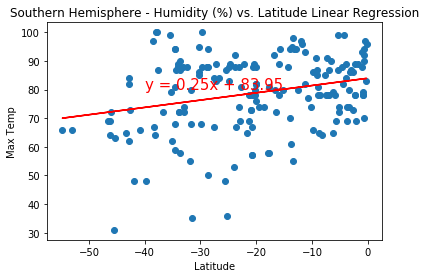

In [49]:
x_values=Southern_df["Lat"].astype(float)
y_values=Southern_df["Humidity"].astype(float)
r_value=st.pearsonr(x_values,y_values)[0]
print("The r_value is "+str(round(r_value,2)))
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.savefig("output_data/fig8.png")
plt.show()

With the linear regression above, we try to model the relationship between City Latitude from southern hemisphere and its humidity. We can tell from the r-value and the figure that there is very week relation between City Latitude from sountern hemisphere and its humidity.As the latitude goes lower in southern hemisphere,cities' humidity does not show any trend to go higher or lower. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r_value is 0.24


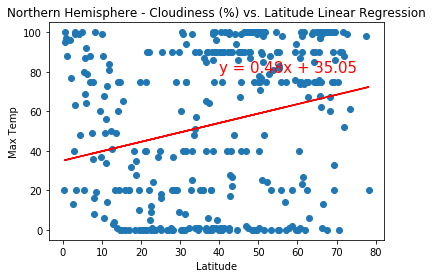

In [46]:
x_values=Northern_df["Lat"].astype(float)
y_values=Northern_df["Cloudiness"].astype(float)
r_value=st.pearsonr(x_values,y_values)[0]
print("The r_value is "+str(round(r_value,2)))
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("output_data/fig9.png")
plt.show()

With the linear regression above, we try to model the relationship between City Latitude from northern hemisphere and its cloudiness. We can tell from the r-value and the figure that there is very week relation between City Latitude from northern hemisphere and its cloudiness.As the latitude goes high in northern hemisphere,cities' cloudiness does not show any trend to go higher or lower. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r_value is 0.04


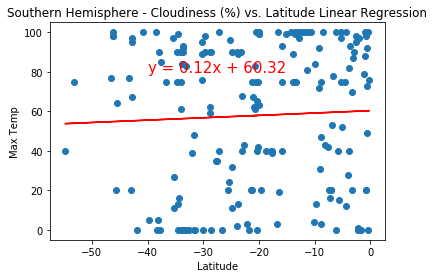

In [55]:
x_values=Southern_df["Lat"].astype(float)
y_values=Southern_df["Cloudiness"].astype(float)
r_value=st.pearsonr(x_values,y_values)[0]
print("The r_value is "+str(round(r_value,2)))
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,80),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig("output_data/fig10.png")
plt.show()

With the linear regression above, we try to model the relationship between City Latitude from southern hemisphere and its cloudiness. We can tell from the r-value and the figure that there is none relation between City Latitude from southern hemisphere and its cloudiness.As the latitude goes lower in southern hemisphere,cities' cloudiness does not show any trend to go higher or lower. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r_value is 0.05


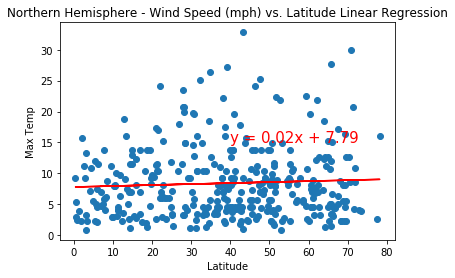

In [54]:
x_values=Northern_df["Lat"].astype(float)
y_values=Northern_df["Wind Speed"].astype(float)
r_value=st.pearsonr(x_values,y_values)[0]
print("The r_value is "+str(round(r_value,2)))
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("output_data/fig11.png")
plt.show()

With the linear regression above, we try to model the relationship between City Latitude from northern hemisphere and its wind speed. We can tell from the r-value and the figure that there is none relation between City Latitude from northern hemisphere and its wind speed.As the latitude goes high in northern hemisphere,cities' wind speed does not show any trend to go higher or lower.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r_value is -0.42


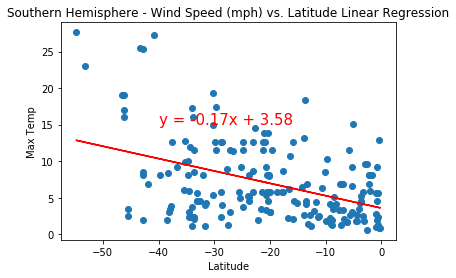

In [53]:
x_values=Southern_df["Lat"].astype(float)
y_values=Southern_df["Wind Speed"].astype(float)
r_value=st.pearsonr(x_values,y_values)[0]
print("The r_value is "+str(round(r_value,2)))
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("output_data/fig12.png")
plt.show()

With the linear regression above, we try to model the relationship between City Latitude from southern hemisphere and its wind speed. We can tell from the r-value and the figure that there is week relation between City Latitude from southern hemisphere and its windspeed.As the latitude goes lower in southern hemisphere,cities' wind speed tend to go a little bit lower but not very significantly.